# notebooks/bitcoin_price_prediction.ipynb

In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
bitcoin_df = pd.read_csv('../data/bitcoin.csv')

In [4]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [6]:
bitcoin_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
# Missing value check
missing_value = bitcoin_df.isnull().sum()
missing_value

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

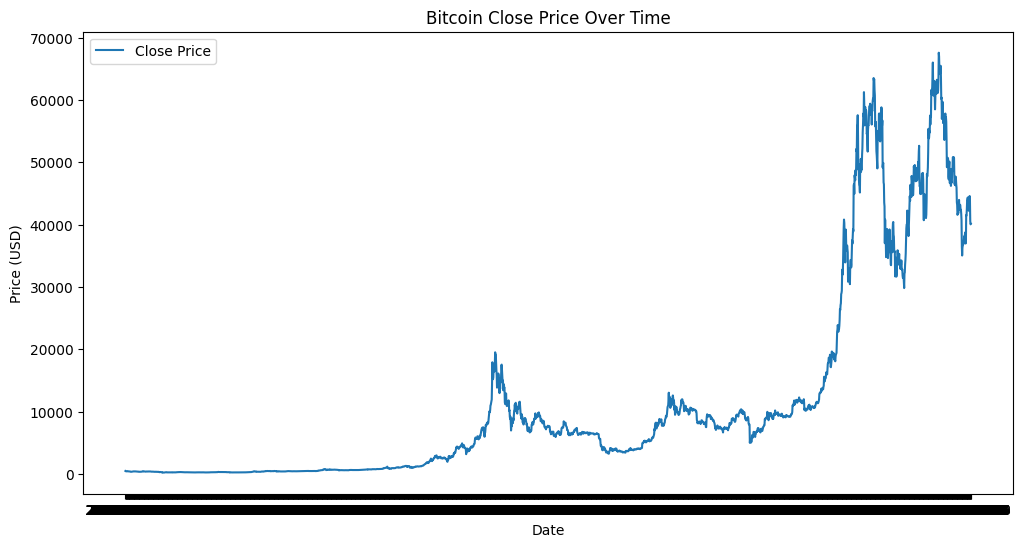

In [10]:
# ------------------------
#  EDA - Trend Over Time
# ------------------------
plt.figure(figsize=(12,6))
plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [16]:
numeric_df = bitcoin_df.select_dtypes(include=['number'])

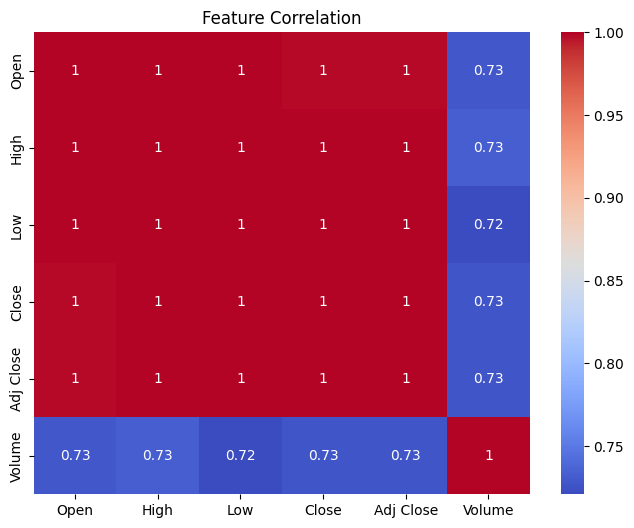

In [17]:
# ------------------------
#  Correlation Analysis
# ------------------------
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [18]:
# ------------------------
# 7. Feature Engineering
# ------------------------
# Creating new features
bitcoin_df['Price_Change'] = bitcoin_df['Close'] - bitcoin_df['Open']
bitcoin_df['Daily_Return'] = bitcoin_df['Close'].pct_change()
bitcoin_df['MA_5'] = bitcoin_df['Close'].rolling(window=5).mean()
bitcoin_df['MA_10'] = bitcoin_df['Close'].rolling(window=10).mean()

In [19]:
bitcoin_df.dropna(inplace=True)

In [20]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Daily_Return,MA_5,MA_10
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800,-7.003998,-0.017370,415.429395,416.144199
10,2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300,-4.036011,-0.012128,414.902991,410.362796
11,2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300,-22.290008,-0.055915,403.180994,405.636896
12,2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700,-1.460999,-0.004544,393.633398,403.703998
13,2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,34707300,10.855987,0.030567,388.707397,401.507999


In [21]:
# ------------------------
# Feature Selection
# ------------------------
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Daily_Return', 'MA_5', 'MA_10']
target = 'Close'

In [22]:
X = bitcoin_df[features]
y = bitcoin_df[target]

In [23]:
# ------------------------
#  Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# ------------------------
# 10. Model 1: Linear Regression
# ------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [25]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [26]:
mse_lr

2.2745768170390517e-16

In [27]:
r2_lr

1.0

In [28]:
print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.4f}")



Linear Regression Performance:
MSE: 0.00, R2 Score: 1.0000


In [29]:
# ------------------------
#  Model 2: Random Forest
# ------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [30]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [31]:
print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.4f}")


Random Forest Performance:
MSE: 99026.18, R2 Score: 0.9996


In [32]:
# ------------------------
#  Feature Importance (Random Forest)
# ------------------------
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)




In [34]:
import warnings
warnings.filterwarnings('ignore')

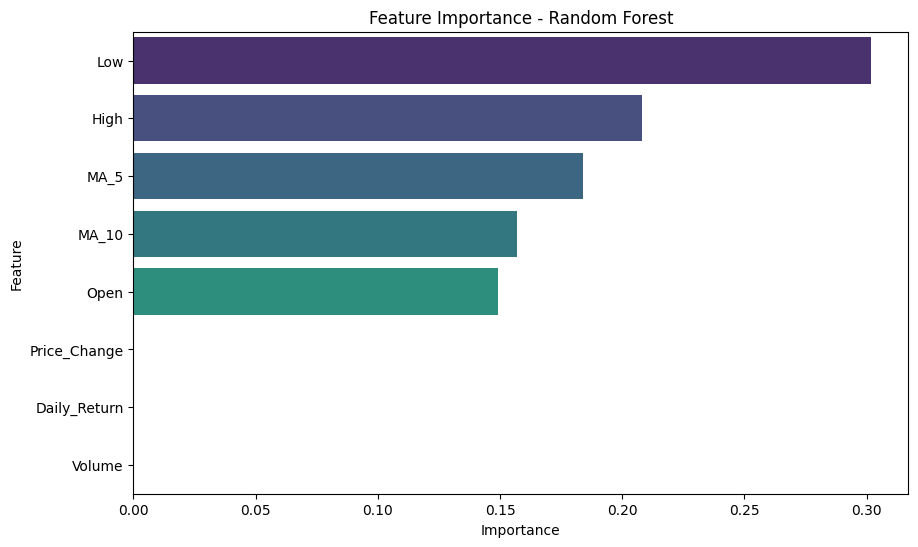

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()

In [36]:
# ------------------------
#  Save Best Model
# ------------------------
import joblib
joblib.dump(rf_model, '../models/bitcoin_rf_model.pkl')
print("\nBest model saved as bitcoin_rf_model.pkl")



Best model saved as bitcoin_rf_model.pkl
